In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importando os arquivos
jogos = pd.read_csv('data/matches_FLA2023.csv', parse_dates=['kick-off'])
gols = pd.read_csv('data/goal_scorers.csv')

In [3]:
# Mostrando as 5 primeiras linhas do dataframe jogos
jogos.head()

,id_match,home_team,away_team,home_score,away_score,tournament,kick-off,stadium
0,CA1,Flamengo,Audax-RJ,1,0,Carioca - Taça Guanabara - Round 5,2023-01-12 21:30:00,Maracanã-RJ
1,CA2,Flamengo,Portuguesa-RJ,4,1,Carioca - Taça Guanabara - Round 1,2023-01-15 18:00:00,Maracanã-RJ
2,CA3,Madureira-RJ,Flamengo,0,0,Carioca - Taça Guanabara - Round 2,2023-01-18 19:00:00,Kléber Andrade-ES
3,CA4,Flamengo,Nova Iguaçu-RJ,5,0,Carioca - Taça Guanabara - Round 3,2023-01-21 16:00:00,Maracanã-RJ
4,CA5,Bangu-RJ,Flamengo,1,1,Carioca - Taça Guanabara - Round 4,2023-01-24 21:10:00,Raulino de Oliveira-RJ


In [4]:
# Mostrando as 5 primeiras linhas do dataframe gols
gols.head()

,id_match,gols,assist
0,CA1,Matheus França,Thiaguinho
1,CA2,Pedro,Ayrton Lucas
2,CA2,Gabi,Pedro
3,CA2,Fabrício Bruno,Pedro
4,CA2,Thiago Maia,Matheuzinho


In [5]:
# Split o nome do torneio e a rodada
lista = [i.split(' -', 1)[0] for i in jogos["tournament"].tolist()]

# Transformando em uma nova coluna chamada torneio
jogos['torneio'] = np.array(lista)

In [6]:
# Fazendo o merge dos dataframes jogo e gols
df = pd.merge(jogos, gols, on = 'id_match')
df.head()

,id_match,home_team,away_team,home_score,away_score,tournament,kick-off,stadium,torneio,gols,assist
0,CA1,Flamengo,Audax-RJ,1,0,Carioca - Taça Guanabara - Round 5,2023-01-12 21:30:00,Maracanã-RJ,Carioca,Matheus França,Thiaguinho
1,CA2,Flamengo,Portuguesa-RJ,4,1,Carioca - Taça Guanabara - Round 1,2023-01-15 18:00:00,Maracanã-RJ,Carioca,Pedro,Ayrton Lucas
2,CA2,Flamengo,Portuguesa-RJ,4,1,Carioca - Taça Guanabara - Round 1,2023-01-15 18:00:00,Maracanã-RJ,Carioca,Gabi,Pedro
3,CA2,Flamengo,Portuguesa-RJ,4,1,Carioca - Taça Guanabara - Round 1,2023-01-15 18:00:00,Maracanã-RJ,Carioca,Fabrício Bruno,Pedro
4,CA2,Flamengo,Portuguesa-RJ,4,1,Carioca - Taça Guanabara - Round 1,2023-01-15 18:00:00,Maracanã-RJ,Carioca,Thiago Maia,Matheuzinho


In [7]:
# Quantidade de gols por jogador
df_gols_counts = pd.DataFrame(df.gols.value_counts())
df_gols_counts = df_gols_counts.reset_index()
df_gols_counts.columns = ['Jogador', 'Gols'] 

# Convertendo para Markdown
print(df_gols_counts.to_markdown(index=False))

| Jogador           |   Gols |
|:------------------|-------:|
| Pedro             |     24 |
| Gabi              |     16 |
| Ayrton Lucas      |      6 |
| Matheus França    |      3 |
| Arrascaeta        |      3 |
| Léo Pereira       |      3 |
| Gerson            |      3 |
| Everton Cebolinha |      3 |
| Fabrício Bruno    |      3 |
| Matheus Gonçalves |      2 |
| Thiago Maia       |      2 |
| André Luiz        |      1 |
| Lorran            |      1 |
| Everton Ribeiro   |      1 |
| David Luiz        |      1 |
| Eric Pulgar       |      1 |
| Wesley            |      1 |
| Victor Hugo       |      1 |
| Bruno Henrique    |      1 |


In [8]:
# Quantidade de assistência por jogador

df_assist_counts = pd.DataFrame(df.assist.value_counts())
df_assist_counts = df_assist_counts.reset_index()
df_assist_counts.columns = ['Jogador', 'Assistência'] 
print(df_assist_counts.to_markdown(index=False))

| Jogador           |   Assistência |
|:------------------|--------------:|
| Everton Cebolinha |             8 |
| Gerson            |             6 |
| Arrascaeta        |             5 |
| Ayrton Lucas      |             5 |
| Matheuzinho       |             4 |
| Pedro             |             3 |
| Everton Ribeiro   |             3 |
| Marinho           |             3 |
| Gabi              |             2 |
| Arturo Vidal      |             2 |
| Eric Pulgar       |             2 |
| Fabricio Bruno    |             2 |
| Wesley            |             2 |
| Mateusão          |             2 |
| Victor Hugo       |             1 |
| Pablo             |             1 |
| Filipe Luis       |             1 |
| David Luiz        |             1 |
| Thiaguinho        |             1 |


In [9]:
new_df = pd.concat([df_assist_counts, df_gols_counts], axis=1)

print(new_df.to_markdown(index=False))

| Jogador           |   Assistência | Jogador           |   Gols |
|:------------------|--------------:|:------------------|-------:|
| Everton Cebolinha |             8 | Pedro             |     24 |
| Gerson            |             6 | Gabi              |     16 |
| Arrascaeta        |             5 | Ayrton Lucas      |      6 |
| Ayrton Lucas      |             5 | Matheus França    |      3 |
| Matheuzinho       |             4 | Arrascaeta        |      3 |
| Pedro             |             3 | Léo Pereira       |      3 |
| Everton Ribeiro   |             3 | Gerson            |      3 |
| Marinho           |             3 | Everton Cebolinha |      3 |
| Gabi              |             2 | Fabrício Bruno    |      3 |
| Arturo Vidal      |             2 | Matheus Gonçalves |      2 |
| Eric Pulgar       |             2 | Thiago Maia       |      2 |
| Fabricio Bruno    |             2 | André Luiz        |      1 |
| Wesley            |             2 | Lorran            |     

In [10]:
# Filtros para obter o numero de vitórias, derrotas e empates
vitorias_casa = jogos[(jogos['home_team'] == 'Flamengo') & (jogos['home_score'] > jogos['away_score'])]
derrotas_casa = jogos[(jogos['home_team'] == 'Flamengo') & (jogos['home_score'] < jogos['away_score'])]

vitorias_fora = jogos[(jogos['away_team'] == 'Flamengo') & (jogos['away_score'] > jogos['home_score'])]
derrota_fora = jogos[(jogos['away_team'] == 'Flamengo') & (jogos['away_score'] < jogos['home_score'])]

empate_casa = jogos[(jogos['home_team'] == 'Flamengo') & (jogos['away_score'] == jogos['home_score'])]
empate_fora = jogos[(jogos['away_team'] == 'Flamengo') & (jogos['away_score'] == jogos['home_score'])]

vitorias = vitorias_casa.shape[0] + vitorias_fora.shape[0]
empates = empate_casa.shape[0] + empate_fora.shape[0]
derrotas = derrotas_casa.shape[0] + derrota_fora.shape[0]
total_jogos = vitorias + empates + derrotas

In [11]:
# Filtros para obter o número de jogos que marcou e sofreu gols
j_marcou_casa = jogos[(jogos['home_team'] == 'Flamengo') & (jogos['home_score'] > 0)]
j_marcou_fora =  jogos[(jogos['away_team'] == 'Flamengo') & (jogos['away_score'] > 0)]

jogou_marcou = j_marcou_casa.shape[0] + j_marcou_fora.shape[0]

j_sofreu_casa = jogos[(jogos['home_team'] == 'Flamengo') & (jogos['away_score'] > 0)]
j_sofreu_fora =  jogos[(jogos['away_team'] == 'Flamengo') & (jogos['home_score'] > 0)]

jogou_sofreu = j_sofreu_casa.shape[0] + j_sofreu_fora.shape[0]

In [12]:
# Calculando os gols pró
gols_pro = vitorias_casa['home_score'].sum() + derrotas_casa['home_score'].sum() + vitorias_fora['away_score'].sum() + derrota_fora['away_score'].sum() + empate_casa['home_score'].sum() + empate_fora['away_score'].sum()
gols_per_jogo = round(gols_pro/total_jogos,2)

# Calculando os gols sofridos
gols_contra = vitorias_casa['away_score'].sum() + derrotas_casa['away_score'].sum() + vitorias_fora['home_score'].sum() + derrota_fora['home_score'].sum() + empate_casa['away_score'].sum() + empate_fora['home_score'].sum()
gols_sofrido_jogo = round(gols_contra/total_jogos,2)

# Saldo de gols
saldo_gols = gols_pro - gols_contra

In [13]:
# Calculando o aproveitamento
aproveitamento = round((3*vitorias + 1*empates + 0*derrotas)/(3*total_jogos)*100,2)
aproveitamento_pontos = (3*vitorias + 1*empates + 0*derrotas)

In [14]:
print(
"""
Jogos: {0}
Vitórias: {1}
Empates: {2}
Derrotas: {3} 
Gols pro: {4}
Gols contra: {5}
Saldo de gols: +{6}
Gols/jogo: {7}
Gols sofridos/jogo: {13}
Jogos em que marcou: {8}
Jogos em que sofreu gol: {9} 
Aproveitamento: {10}%
Aproveitamento pontos: {11}/{12}
""".format(total_jogos, vitorias, empates, derrotas, 
           gols_pro, gols_contra, saldo_gols, gols_per_jogo, jogou_marcou, 
           jogou_sofreu,aproveitamento,aproveitamento_pontos, 3*total_jogos,gols_sofrido_jogo) 


)


Jogos: 39
Vitórias: 22
Empates: 6
Derrotas: 11 
Gols pro: 76
Gols contra: 43
Saldo de gols: +33
Gols/jogo: 1.95
Gols sofridos/jogo: 1.1
Jogos em que marcou: 34
Jogos em que sofreu gol: 24 
Aproveitamento: 61.54%
Aproveitamento pontos: 72/117



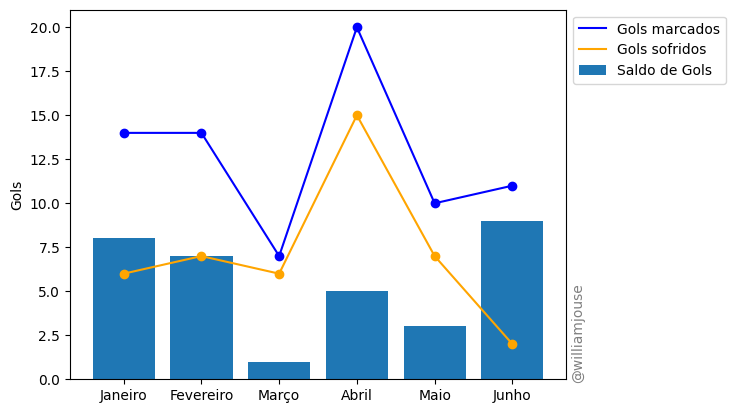

In [15]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June'] 
             #'July', 'August', 'September', 'October', 'November', 'December']
    
labels = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho']

gols_home = j_marcou_casa.groupby(j_marcou_casa['kick-off'].dt.month_name())['home_score'].agg(['sum', 'mean']).reindex(new_order, axis=0)
gols_away = j_marcou_fora.groupby(j_marcou_fora['kick-off'].dt.month_name())['away_score'].agg(['sum', 'mean']).reindex(new_order, axis=0)

sofridos_home = j_sofreu_casa.groupby(j_sofreu_casa['kick-off'].dt.month_name())['away_score'].agg(['sum', 'mean']).reindex(new_order, axis=0)
sofridos_away = j_sofreu_fora.groupby(j_sofreu_fora['kick-off'].dt.month_name())['home_score'].agg(['sum', 'mean']).reindex(new_order, axis=0)

gols_feitos_total = gols_home['sum'].fillna(0)+gols_away['sum'].fillna(0)
gols_sofridos_total = sofridos_home['sum'].fillna(0)+sofridos_away['sum'].fillna(0)

saldo = gols_feitos_total - gols_sofridos_total

gols_feitos_media = gols_home['mean'].fillna(0)+gols_away['mean'].fillna(0)
gols_sofridos_media = sofridos_home['mean'].fillna(0)+sofridos_away['mean'].fillna(0)

#plt.rcParams["figure.autolayout"] = True

plt.bar(saldo.index, saldo, label = 'Saldo de Gols')


plt.plot(gols_feitos_total.index, gols_feitos_total, c = 'blue', label = 'Gols marcados')
plt.scatter(gols_feitos_total.index, gols_feitos_total, c = 'blue')


plt.plot(gols_sofridos_total.index, gols_sofridos_total, c = 'orange', label = 'Gols sofridos')
plt.scatter(gols_sofridos_total.index, gols_sofridos_total, c = 'orange')


#plt.axhline(gols_feitos_total.mean(), ls = '--', c = 'blue', label = 'Média de gols marcados')
#plt.axhline(gols_sofridos_total.mean(), ls = '--', c = 'orange', label = 'Média de gols sofridos')

plt.ylabel('Gols')
plt.xticks(gols_home.index, labels)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

plt.figtext(.93, 0.31, '@williamjouse', ha='right', va='top', alpha=0.5, fontsize=10, rotation=90)

plt.savefig('figures/figure.png', dpi = 300, bbox_inches='tight')
 
plt.show()

In [16]:
pd.concat([vitorias_casa, vitorias_fora], sort=False).sort_index()

,id_match,home_team,away_team,home_score,away_score,tournament,kick-off,stadium,torneio
0,CA1,Flamengo,Audax-RJ,1,0,Carioca - Taça Guanabara - Round 5,2023-01-12 21:30:00,Maracanã-RJ,Carioca
1,CA2,Flamengo,Portuguesa-RJ,4,1,Carioca - Taça Guanabara - Round 1,2023-01-15 18:00:00,Maracanã-RJ,Carioca
3,CA4,Flamengo,Nova Iguaçu-RJ,5,0,Carioca - Taça Guanabara - Round 3,2023-01-21 16:00:00,Maracanã-RJ,Carioca
6,CA6,Flamengo,Boavista,1,0,Carioca - Taça Guanabara - Round 6,2023-02-01 21:10:00,Maracanã-RJ,Carioca
8,CW2,Al Ahly SC,Flamengo,2,4,Club World Championship - 3rd place final,2023-02-11 12:30:00,Complexe Sportif Moulay Abdellah-Marrocos,Club World Championship
9,CA7,Volta Redonda,Flamengo,1,3,Carioca - Taça Guanabara - Round 8,2023-02-16 21:10:00,Raulino de Oliveira-RJ,Carioca
10,CA8,Resende,Flamengo,0,2,Carioca - Taça Guanabara - Round 7,2023-02-18 16:00:00,Raulino de Oliveira-RJ,Carioca
12,CA9,Botafogo,Flamengo,0,1,Carioca - Taça Guanabara - Round 9,2023-02-25 18:00:00,Mané Garrincha-DF,Carioca
13,RE2,Flamengo,Independiente del Valle,1,0,Recopa Sudamericana - Second leg,2023-02-28 21:30:00,Maracanã-RJ,Recopa Sudamericana
16,CA12,Flamengo,Vasco,3,2,Carioca - Semifinal - First leg,2023-03-13 21:25:00,Maracanã-RJ,Carioca


In [17]:
pd.concat([derrotas_casa, derrota_fora], sort=False).sort_index()

,id_match,home_team,away_team,home_score,away_score,tournament,kick-off,stadium,torneio
5,SC1,Palmeiras,Flamengo,4,3,Supercopa do Brasil,2023-01-28 16:30:00,Mané Garrincha-DF,Supercopa do Brasil
7,CW1,Flamengo,Al-Hilal Saudi,2,3,Club World Championship - Semifinal,2023-02-07 16:00:00,Ibn Batouta Stadium-Marrocos,Club World Championship
11,RE1,Independiente del Valle,Flamengo,1,0,Recopa Sudamericana - First leg,2023-02-21 21:30:00,Banco de Guayaquil-Equador,Recopa Sudamericana
14,CA10,Flamengo,Vasco,0,1,Carioca - Taça Guanabara - Round 10,2023-03-05 18:10:00,Maracanã-RJ,Carioca
15,CA11,Flamengo,Fluminense,1,2,Carioca - Taça Guanabara - Round 11,2023-03-09 21:10:00,Maracanã-RJ,Carioca
19,LIB1,Aucas,Flamengo,2,1,Copa Libertadores da América - Round 1,2023-04-05 19:00:00,Gonzalo Pozo Ripalda-Equador,Copa Libertadores da América
20,CA15,Fluminense,Flamengo,4,1,Carioca - Final - Second leg,2023-04-09 18:00:00,Maracanã-RJ,Carioca
21,CB1,Maringá,Flamengo,2,0,Copa do Brasil - Round 3 - First leg,2023-04-13 20:00:00,Willie Davids-PR,Copa do Brasil
24,BR2,Internacional,Flamengo,2,1,Campeonato Brasileiro - Round 2,2023-04-23 11:30:00,Beira Rio-RS,Campeonato Brasileiro
26,BR3,Flamengo,Botafogo,2,3,Campeonato Brasileiro - Round 3,2023-04-30 16:00:00,Maracanã-RJ,Campeonato Brasileiro


In [18]:
pd.concat([empate_casa, empate_fora], sort=False).sort_index()

,id_match,home_team,away_team,home_score,away_score,tournament,kick-off,stadium,torneio
2,CA3,Madureira-RJ,Flamengo,0,0,Carioca - Taça Guanabara - Round 2,2023-01-18 19:00:00,Kléber Andrade-ES,Carioca
4,CA5,Bangu-RJ,Flamengo,1,1,Carioca - Taça Guanabara - Round 4,2023-01-24 21:10:00,Raulino de Oliveira-RJ,Carioca
27,LIB3,Racing,Flamengo,1,1,Copa Libertadores da América - Round 3,2023-05-04 19:00:00,Presidente Perón-Argentina,Copa Libertadores da América
31,CB3,Fluminense,Flamengo,0,0,Copa do Brasil - Round 4 - First leg,2023-05-16 21:00:00,Maracanã-RJ,Copa do Brasil
33,LIB4,Ñublense,Flamengo,1,1,Copa Libertadores da América - Round 4,2023-05-24 21:30:00,Municipal de Collao-Chile,Copa Libertadores da América
34,BR8,Flamengo,Cruzeiro,1,1,Campeonato Brasileiro - Round 8,2023-05-27 18:30:00,Maracanã-RJ,Campeonato Brasileiro


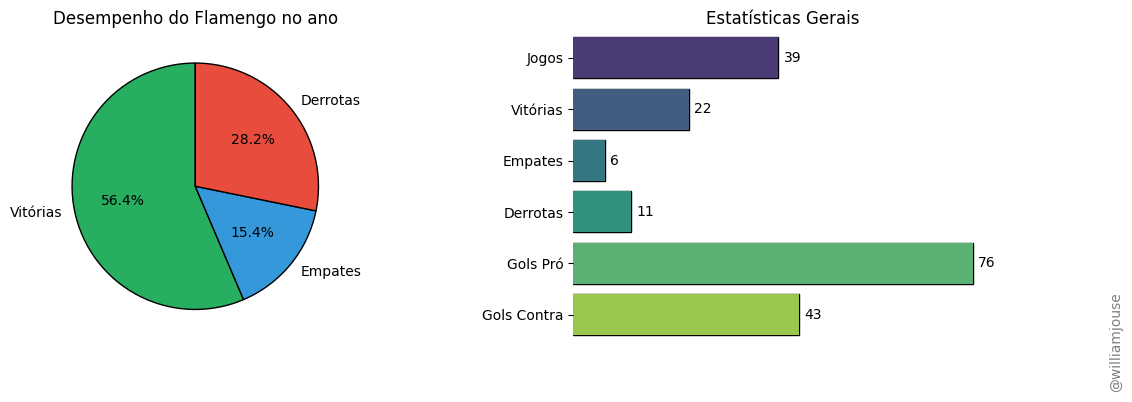

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(13, 4))

# Gráfico de pizza - Divisão entre vitórias, empates e derrotas
axs[0].pie([vitorias, empates, derrotas], labels=['Vitórias', 'Empates', 'Derrotas'], 
           autopct='%1.1f%%', startangle=90, colors=['#27AE60', '#3498DB', '#E74C3C'], wedgeprops={'edgecolor': 'black'})

axs[0].set_title('Desempenho do Flamengo no ano')

labels = ['Jogos', 'Vitórias', 'Empates', 'Derrotas', 'Gols Pró', 'Gols Contra']
values = [total_jogos, vitorias, empates, derrotas, gols_pro, gols_contra]
         
axs[1].barh(labels, values, color=['#27AE60', 'black', '#E74C3C', '#3498DB'], edgecolor='black')

for i, value in enumerate(values):
    axs[1].text(value + 1, i, str(value), va='center')
    
import seaborn as sns    
sns.barplot(x=values, y=labels, ax=axs[1], palette='viridis')

# Configuração da moldura
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].set_xticks([])


axs[1].set_title('Estatísticas Gerais')

# Ajustar a posição dos subplots
plt.subplots_adjust(wspace=0.4)

plt.figtext(1.0, 0.23, '@williamjouse', ha='right', va='top', alpha=0.5, fontsize=10, rotation=90)

plt.savefig('figures/figure2.png', dpi = 300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [20]:
auxiliar1 = pd.concat([vitorias_casa, vitorias_fora], sort=False).sort_index()

auxiliar2 = pd.concat([empate_casa, empate_fora], sort=False).sort_index()

auxiliar3 = pd.concat([derrotas_casa, derrota_fora], sort=False).sort_index()

auxiliar1.groupby(auxiliar1['torneio'])['id_match'].count()

auxiliar2.groupby(auxiliar2['torneio'])['id_match'].count()

auxiliar3.groupby(auxiliar3['torneio'])['id_match'].count()

torneio
Campeonato Brasileiro           3
Carioca                         3
Club World Championship         1
Copa Libertadores da América    1
Copa do Brasil                  1
Recopa Sudamericana             1
Supercopa do Brasil             1
Name: id_match, dtype: int64

In [21]:
DF1 = auxiliar1.groupby(auxiliar1['torneio'])['id_match'].size()

DF2 = auxiliar2.groupby(auxiliar2['torneio'])['id_match'].size()

DF3 = auxiliar3.groupby(auxiliar3['torneio'])['id_match'].size()

new_df = pd.DataFrame(DF1)
new_df2 = pd.DataFrame(DF2)
new_df3 = pd.DataFrame(DF3)


#new_df.columns = ['Vitorias', 'Empates', 'Derrotas'] 

#pd.concat([DF1,DF2,DF3], axis=1)
#new_df3

PB = pd.concat([new_df,new_df2,new_df3], axis=1)
PB.columns = range(len(PB.columns))
PB.columns = range(len(PB.columns))
PB.columns = ['Vitórias', 'Empates', 'Derrotas']


PB['Vitórias'] = PB['Vitórias'].astype(float).astype('Int64')
PB['Empates'] = PB['Empates'].astype(float).astype('Int64')


PB.fillna(0)

,Vitórias,Empates,Derrotas
torneio,,,
Campeonato Brasileiro,6,1,3
Carioca,10,2,3
Club World Championship,1,0,1
Copa Libertadores da América,2,2,1
Copa do Brasil,2,1,1
Recopa Sudamericana,1,0,1
Supercopa do Brasil,0,0,1


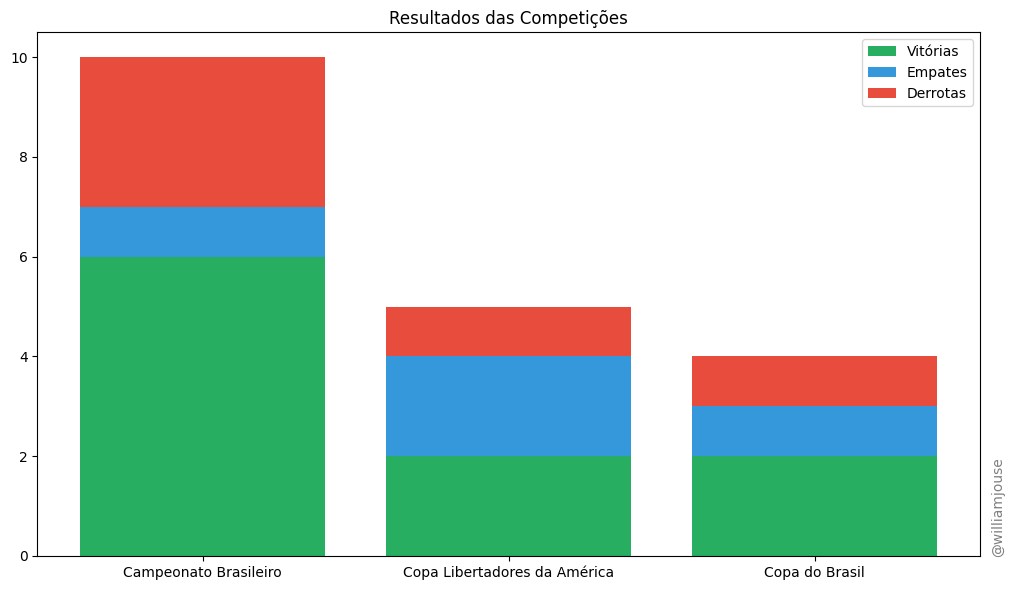

In [22]:
# Dados dos torneios

indices_loc = ['Campeonato Brasileiro', 'Copa Libertadores da América', 'Copa do Brasil']
df_loc = PB.loc[indices_loc]

torneios = df_loc.index
vitorias = df_loc.Vitórias.values
empates = df_loc.Empates.values
derrotas = df_loc.Derrotas.values

colors = ['#27AE60', '#3498DB', '#E74C3C']

# Configurações do gráfico
plt.figure(figsize=(10, 6))
plt.bar(range(len(torneios)), vitorias, color=colors[0], label='Vitórias')
plt.bar(range(len(torneios)), empates, color=colors[1], bottom=vitorias, label='Empates')
plt.bar(range(len(torneios)), derrotas, color=colors[2], bottom=[vitorias[j] + empates[j] for j in range(len(vitorias))], label='Derrotas')

# Adicionando rótulos nos eixos
#plt.xlabel('Torneios')
#plt.ylabel('Quantidade')
plt.xticks(range(len(torneios)), torneios)


# Adicionando título ao gráfico
plt.title('Resultados das Competições')

# Adicionando legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()

plt.figtext(1.01, 0.23, '@williamjouse', ha='right', va='top', alpha=0.5, fontsize=10, rotation=90)

plt.savefig('figures/figure3.png', dpi = 300, bbox_inches='tight')

plt.show()

In [23]:
def obter_resultado(row):
    if row['home_team'] == 'Flamengo':
        gols_marcados = row['home_score']
        gols_sofridos = row['away_score']
        
        if gols_marcados < gols_sofridos:
            return 'Derrota'
        elif gols_marcados > gols_sofridos:
            return 'Vitória'
        else:
            return 'Empate'
    if row['away_team'] == 'Flamengo':
        gols_marcados = row['away_score']
        gols_sofridos = row['home_score']

        if gols_marcados < gols_sofridos:
            return 'Derrota'
        elif gols_marcados > gols_sofridos:
            return 'Vitória'
        else:
            return 'Empate'

# Aplicar a função para criar a nova coluna
jogos['resultado'] = jogos.apply(obter_resultado, axis=1)

jogos['resultado'].value_counts()

Vitória    22
Derrota    11
Empate      6
Name: resultado, dtype: int64

In [24]:
jogos['Mês'] = jogos['kick-off'].dt.month_name()

victory = jogos.groupby(['Mês', 'resultado']).size().unstack().reindex(new_order, axis=0)

victory

resultado,Derrota,Empate,Vitória
Mês,,,
January,1.0,2.0,3.0
February,2.0,NaN,6.0
March,2.0,NaN,2.0
April,5.0,NaN,4.0
May,1.0,4.0,3.0
June,NaN,NaN,4.0


Text(0.5, 1.0, 'Distribuição de Vitórias, Derrotas e Empates por Mês')

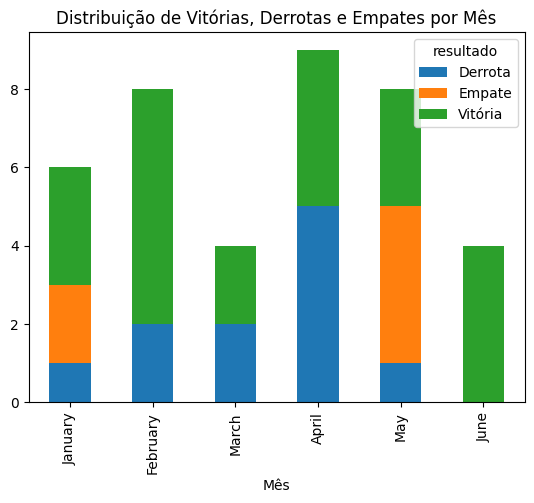

In [25]:
fig, ax = plt.subplots()
victory.plot(kind='bar', stacked=True, ax=ax)


ax.set_title('Distribuição de Vitórias, Derrotas e Empates por Mês')
#plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
